### Wazobia DataSet on Student Performace

In [1]:
import pandas as pd

In [7]:
pd.set_option("max_columns", 200)
pd.set_option("max_rows", 200)

data = pd.read_csv("train.csv")
data_train = pd.read_csv("test.csv")

In [13]:
data.head()

,S/N,Gender,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences,Score
0,1,F,13,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,4,3,3,4,22
1,2,F,12,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,5,3,3,2,31
2,3,F,10,U,LE3,T,1,1,1,2,0,yes,no,no,no,yes,yes,yes,4,3,3,6,37
3,4,F,10,U,GT3,T,4,2,1,3,0,no,yes,no,yes,yes,yes,yes,3,2,5,0,42
4,5,F,11,U,GT3,T,3,3,1,2,0,no,yes,no,no,yes,yes,no,4,3,5,0,37


In [11]:
data.columns.isin(data_train.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False], dtype=bool)

In [12]:
data_train.head()

,S/N,Age,Location,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,health,absences
0,327,12,U,LE3,A,3,2,1,1,0,no,no,no,no,yes,yes,yes,4,4,3,18
1,328,13,R,LE3,T,1,1,2,4,0,no,yes,no,yes,yes,yes,no,5,2,3,2
2,329,13,U,GT3,T,1,1,2,2,0,yes,no,no,yes,yes,yes,yes,5,4,4,0
3,330,12,U,GT3,T,2,2,1,2,0,no,yes,no,no,no,yes,yes,5,4,5,12
4,331,13,U,GT3,T,2,1,2,2,0,no,no,no,yes,yes,yes,yes,4,3,5,10


In [15]:
#Drop Gender Column in Train
def readFile(file=None, drop_column=None):
    """
    read csv file and drop columns that doesn't exist in both train and test data
    """
    data = pd.read_csv(file)
    try:
        data.drop(drop_column, inplace=True, axis=1)
    except ValueError:
        print("An Exception was caught; Column None is not in dataFrame")
        pass
    print(data.shape)
    #print(data.head())
    return data

train = readFile(file="train.csv", drop_column="Gender")
test = readFile(file="test.csv")

(325, 22)
An Exception was caught; Column None is not in dataFrame
(323, 21)


In [36]:
#train.drop(train[train['absences']>25].index).shape
idx = train['S/N']

#Work with the train Dataset:
#Seperate the categorical and numerical
def extractData(data):
    """
    Seperate the datasets int numerical and non-numerical datasets
    """
    catData = data.select_dtypes(include=["object"])
    numData = data.select_dtypes(exclude=["object"])
    print("Columns with Categorical Data {}".format(catData.columns))
    print("Columns with Numerical Data {}".format(numData.columns))
    return catData, numData

catTrain, numTrain = extractData(train)
catTest, numTest = extractData(test)

In [400]:
numTrain.describe()

numTrain.drop("S/N", axis=1, inplace=True)

def corr_matrix(numData):
    """
    Takes the Numerical Datasets and do a correlation matrix map on it
    """
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
    corr = numData.corr()
    fig, ax = plt.subplots(figsize=(6, 6))
    show = ax.matshow(corr, cmap = cm.coolwarm, vmin=-1, vmax=1) #Needed to cast this into a variable for plt.colorbar use
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(show)
    plt.show()
    return corr

corrNumTrain = corr_matrix(numTrain)

In [24]:
corrNumTrain

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(numTrain)

In [26]:
test.absences.describe()

count    323.000000
mean       2.916409
std        3.750256
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       21.000000
Name: absences, dtype: float64

In [57]:
#Removing the Least Uncorrelated Values
numTrainUncorr = numTrain.drop(["famrel", "freetime"], axis=1)
numTestUncorr = numTest.drop(["famrel", "freetime"], axis=1)

In [67]:
#Create Column with multiplied famrel and freetime
numTrainMultiply = numTrain.copy()
numTestMultiply = numTest.copy()
numTrainMultiply['famrel_freetime'] = numTrainMultiply['famrel'] * numTrainMultiply["freetime"]
numTestMultiply['famrel_freetime'] = numTestMultiply['famrel'] * numTestMultiply["freetime"]

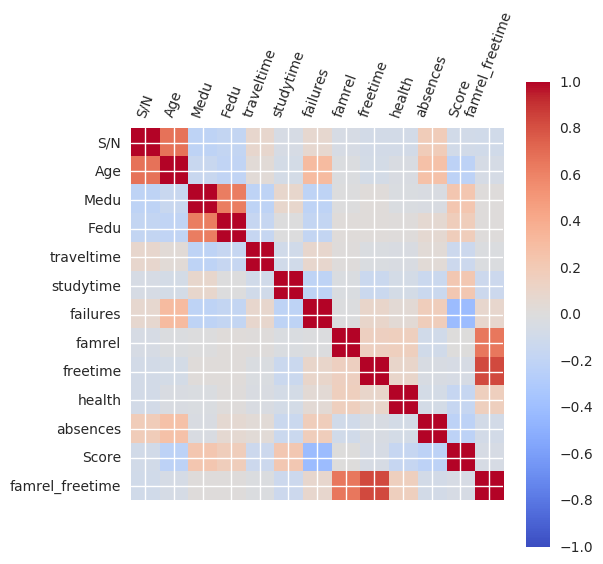

In [70]:
corrMultiply = corr_matrix(numTrainMultiply)

In [71]:
corrMultiply

,S/N,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score,famrel_freetime
S/N,1.000000,0.673927,-0.209204,-0.175051,0.083653,-0.047959,0.071664,-0.047764,-0.073978,-0.075734,0.185527,-0.078188,-0.093208
Age,0.673927,1.000000,-0.146428,-0.192583,0.035163,-0.068840,0.307116,-0.019017,-0.062809,-0.033313,0.270823,-0.218478,-0.058327
Medu,-0.209204,-0.146428,1.000000,0.625634,-0.210531,0.089956,-0.203949,-0.002927,0.019491,-0.030529,-0.032706,0.234127,0.009998
Fedu,-0.175051,-0.192583,0.625634,1.000000,-0.162093,-0.004561,-0.178322,0.019931,0.018134,0.008697,0.059223,0.173798,0.014879
traveltime,0.083653,0.035163,-0.210531,-0.162093,1.000000,-0.092015,0.081078,0.008302,-0.030421,-0.036245,0.037758,-0.123410,-0.017596
studytime,-0.047959,-0.068840,0.089956,-0.004561,-0.092015,1.000000,-0.210651,-0.024894,-0.127890,-0.070006,-0.129136,0.219394,-0.122423
failures,0.071664,0.307116,-0.203949,-0.178322,0.081078,-0.210651,1.000000,-0.009147,0.098652,0.046451,0.174544,-0.408658,0.082571
famrel,-0.047764,-0.019017,-0.002927,0.019931,0.008302,-0.024894,-0.009147,1.000000,0.155049,0.160162,-0.086311,0.007596,0.652135
freetime,-0.073978,-0.062809,0.019491,0.018134,-0.030421,-0.127890,0.098652,0.155049,1.000000,0.095062,-0.046790,-0.050816,0.831848
health,-0.075734,-0.033313,-0.030529,0.008697,-0.036245,-0.070006,0.046451,0.160162,0.095062,1.000000,-0.064186,-0.157126,0.156311


In [77]:
#Random Forest on CatData
catTrainRF = catTrain.copy()
catTestRF = catTest.copy()
catTrainRF['Score'] = numTrain['Score']
catTestRF['Score'] = numTrain['Score']

def prepareCategorical(fullData, trainDF, testDF, label=None, offcolumns=None):
    """
    fullData == use to extract label in case you want to train only Categorical datasets
    trainDF == Training Categorical Sets
    testDF == Test Categorical Sets
    label == label column
    offcolumns == other columns to remove before converting to dummies, 
                could be a list of columns or a string of one column
    """
    
    import pandas as pd
    
    
    labelDF = fullData[label]
    #trainDF = trainDF.drop(label, axis=1)
    idx = trainDF.shape[0]
    joinedDF = pd.concat([trainDF, testDF], ignore_index=True)
    joinedDF = joinedDF.drop(offcolumns, axis=1)
    joinedDF = pd.get_dummies(joinedDF, prefix=list(joinedDF.columns))
    trainDF = joinedDF.iloc[:idx, :]
    testDF = joinedDF.iloc[idx:, :]
    trainDF[label] = labelDF
    return trainDF, testDF

catTrainDF, catTestDF = prepareCategorical(train, catTrainRF, catTestRF, label='Score', offcolumns='Score')

In [83]:
catTestDF.shape, catTrainDF.shape

((323, 20), (325, 21))

In [336]:
#Train RandomForest on all values then Correlated Values
def createCV(data, label=None, random=0):
    """
    Creates train and cross-validation datasets
    data = Dataset to split
    label= Label of dataset
    random = random_state for constant values
    """
    from sklearn.model_selection import train_test_split
    dataLabel = data[label]
    columns = data.columns.tolist()
    columns.remove(label)
    dataX = data.loc[:, columns]
    trainX, CVX, trainY, CVY = train_test_split(dataX, dataLabel, test_size=0.4, random_state=random)
    return trainX, CVX, trainY, CVY

numTrainX, numCVX, numTrainY, numCVY = createCV(catTrainDF, label="Score")

def trainRFRegression(trainX, CVX, trainY, CVY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'n_estimators':[10,20,30], 'max_depth': [2,3,4,5,6]}
    
    rf = RandomForestRegressor()
    grid = GridSearchCV(rf, params, cv=5)
    grid.fit(trainX, trainY)
    print(mean_absolute_error(CVY, grid.best_estimator_.predict(CVX)))
    print("The Root Mean Square Error is {}".format(np.sqrt(
        mean_squared_error(CVY, grid.best_estimator_.predict(CVX)))))
    return grid

modelRF = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

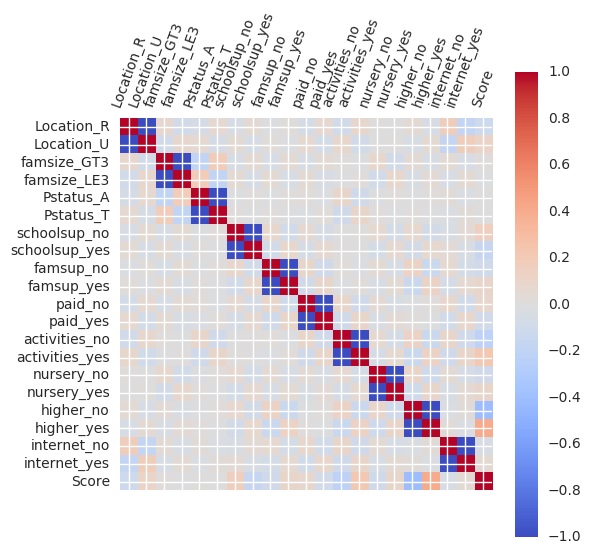

In [86]:
check = corr_matrix(catTrainDF)

In [105]:
colToSelect = ['Location_R', 'Location_U', 'schoolsup_no', 'schoolsup_yes', 'activities_no', 'activities_yes', 'higher_no', 'higher_yes', 'Score']
catTrainDFMoreCorr = catTrainDF.loc[:, colToSelect]
catTestDFMoreCorr = catTestDF.loc[:, colToSelect[:-1]]

In [133]:
numTrainX, numCVX, numTrainY, numCVY = createCV(catTrainDFMoreCorr, label="Score")
modelRF = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

4.85820798031
The Root Mean Square Error is 6.154014692355514


In [110]:
#Combine the more Correlated Featues in both the Categorical and Numerical Variables
def mergeCatNum(numData, catData, label=None):
    import pandas as pd
    
    if label in catData.columns:
        catData = catData.drop(label, axis=1)
    else:
        pass
    mergeData = pd.concat([catData, numData], axis=1)
    return mergeData

mergedTrainUncorr = mergeCatNum(numTrainUncorr, catTrainDFMoreCorr, label="Score")

In [122]:
catTestDFMoreCor = catTestDFMoreCorr.reset_index(drop=True)

mergedTestUncorr = mergeCatNum(numTestUncorr, catTestDFMoreCor,label="Score")
# numTrainUncorr
# numTestUncorr
# catTrainDFMoreCorr
# catTestDFMoreCorr

mergedTestUncorr.head()

In [272]:
numTrainX, numCVX, numTrainY, numCVY = createCV(mergedTrainUncorr, label="Score")
modelRF = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

4.49610084628
The Root Mean Square Error is 5.756901651318375


In [ ]:
#Pick the more Correlated Features


In [54]:
idxTest = test["S/N"]
numTest.drop("S/N", inplace=True, axis=1)

sns.set_style("whitegrid")
mergedcorr = corr_matrix(mergedTrainUncorr)

In [138]:
mergedcorr

,Location_R,Location_U,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,Age,Medu,Fedu,traveltime,studytime,failures,health,absences,Score
Location_R,1.000000,-1.000000,-0.051917,0.051917,-0.086256,0.086256,0.051744,-0.051744,0.083447,-0.121637,-0.069873,0.285257,0.034758,0.026344,-0.002463,0.032852,-0.111883
Location_U,-1.000000,1.000000,0.051917,-0.051917,0.086256,-0.086256,-0.051744,0.051744,-0.083447,0.121637,0.069873,-0.285257,-0.034758,-0.026344,0.002463,-0.032852,0.111883
schoolsup_no,-0.051917,0.051917,1.000000,-1.000000,-0.006051,0.006051,0.074181,-0.074181,0.154474,0.015157,-0.063063,0.027354,-0.084559,-0.005799,0.039265,0.090137,0.159973
schoolsup_yes,0.051917,-0.051917,-1.000000,1.000000,0.006051,-0.006051,-0.074181,0.074181,-0.154474,-0.015157,0.063063,-0.027354,0.084559,0.005799,-0.039265,-0.090137,-0.159973
activities_no,-0.086256,0.086256,-0.006051,0.006051,1.000000,-1.000000,0.125892,-0.125892,0.069897,-0.161585,-0.098511,-0.027075,-0.130846,0.059281,-0.034228,0.106110,-0.212626
activities_yes,0.086256,-0.086256,0.006051,-0.006051,-1.000000,1.000000,-0.125892,0.125892,-0.069897,0.161585,0.098511,0.027075,0.130846,-0.059281,0.034228,-0.106110,0.212626
higher_no,0.051744,-0.051744,0.074181,-0.074181,0.125892,-0.125892,1.000000,-1.000000,0.371974,-0.180876,-0.214566,0.066959,-0.225169,0.375633,0.011134,0.167775,-0.406195
higher_yes,-0.051744,0.051744,-0.074181,0.074181,-0.125892,0.125892,-1.000000,1.000000,-0.371974,0.180876,0.214566,-0.066959,0.225169,-0.375633,-0.011134,-0.167775,0.406195
Age,0.083447,-0.083447,0.154474,-0.154474,0.069897,-0.069897,0.371974,-0.371974,1.000000,-0.146428,-0.192583,0.035163,-0.068840,0.307116,-0.033313,0.270823,-0.218478
Medu,-0.121637,0.121637,0.015157,-0.015157,-0.161585,0.161585,-0.180876,0.180876,-0.146428,1.000000,0.625634,-0.210531,0.089956,-0.203949,-0.030529,-0.032706,0.234127


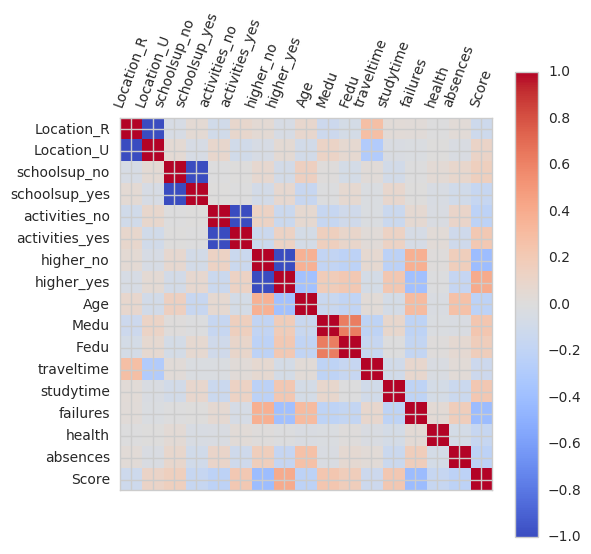

In [159]:
mergedCorr = corr_matrix(mergedTrainUncorr)

In [160]:
mergedTrainUncorr.columns

Index(['Location_R', 'Location_U', 'schoolsup_no', 'schoolsup_yes',
       'activities_no', 'activities_yes', 'higher_no', 'higher_yes', 'Age',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'health',
       'absences', 'Score'],
      dtype='object')

In [162]:
toDropCol = ['Location_R', 'Location_U', 'schoolsup_no', 'schoolsup_yes','Fedu', 'traveltime','health']
trainFewCorr = mergedTrainUncorr.copy()
testFewCorr = mergedTestUncorr.copy()

trainFewCorr.drop(toDropCol, axis=1, inplace=True)
testFewCorr.drop(toDropCol, axis=1, inplace=True)

In [165]:
numTrainX, numCVX, numTrainY, numCVY = createCV(trainFewCorr, label="Score")
modelRF = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

4.43309956868
The Root Mean Square Error is 5.6972950842386325


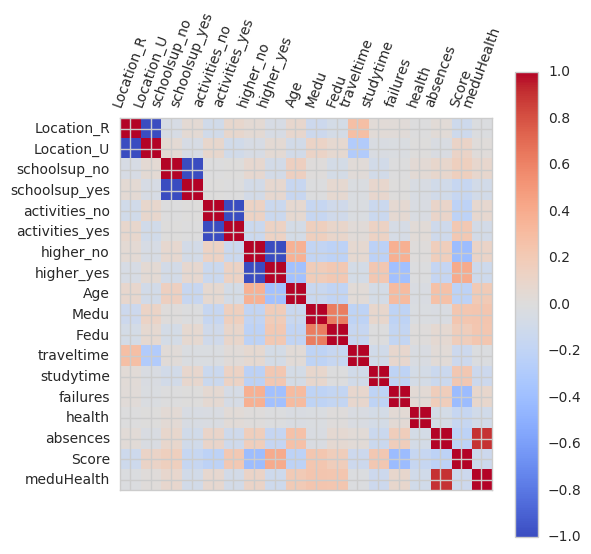

In [158]:
#Travel Time -- Study Time
mergedTravelStudyTrain = mergedTrainUncorr.copy()
mergedTravelStudyTest = mergedTestUncorr.copy()
mergedTravelStudyTrain['meduHealth'] = mergedTravelStudyTrain['absences'] * mergedTravelStudyTrain['Medu']

check = corr_matrix(mergedTravelStudyTrain)

In [167]:
def predictTest(model, testData, testids):
    import pandas as pd
    testY = model.best_estimator_.predict(testData)
    results_df = pd.DataFrame(data={'S/N':testids,'Score':testY})
    results_df.to_csv("Submission.csv", index=False)
    return results_df


results_df = predictTest(modelRF, mergedTestUncorr, idxTest)

In [ ]:
from sklearn.linear_model import ElasticNet

In [177]:
#Ensemble
#Let's try ElasticNet
def trainElasticNet(trainX, CVX, trainY, CVY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import ElasticNetCV
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {"l1_ratio": [0.5, 0.4, 0.2, 0.6], "eps": [0.001, 0.002, 0.01, 0.005], "n_alphas": [100, 200, 300, 50]}
    
    elnet = ElasticNetCV()
    grid = GridSearchCV(elnet, params, cv=5)
    grid.fit(trainX, trainY)
    print(mean_absolute_error(CVY, grid.best_estimator_.predict(CVX)))
    print("The Root Mean Square Error is {}".format(np.sqrt(
        mean_squared_error(CVY, grid.best_estimator_.predict(CVX)))))
    return grid

In [180]:
numTrainX, numCVX, numTrainY, numCVY = createCV(mergedTrainUncorr, label="Score")
modelRF = trainElasticNet(numTrainX, numCVX, numTrainY, numCVY )

4.48434053355
The Root Mean Square Error is 5.740164870274647


In [179]:
results_df = predictTest(modelRF, mergedTestUncorr, idxTest)

In [268]:
def trainLGBRegression(trainX, CVX, trainY, CVY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from lightgbm import LGBMRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'min_child_weight':[4,5], 'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
    
    lgb = LGBMRegressor(n_jobs=1) 
    grid = GridSearchCV(lgb, params, cv=5)
    grid.fit(trainX, trainY)
    print(mean_absolute_error(CVY, grid.best_estimator_.predict(CVX)))
    print("The Root Mean Square Error is {}".format(np.sqrt(
        mean_squared_error(CVY, grid.best_estimator_.predict(CVX)))))
    return grid

In [303]:
numTrainX, numCVX, numTrainY, numCVY = createCV(mergedTrainUncorr, label="Score")
modelRF = trainLGBRegression(numTrainX, numCVX, numTrainY, numCVY )

4.50897838637
The Root Mean Square Error is 5.835897282678262


In [304]:
results_df = predictTest(modelRF, mergedTestUncorr, idxTest)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
def trainSGDRegressor(trainX, CVX, trainY, CVY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import SGDRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'min_child_weight':[4,5], 'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
    
    sgdr = SGDRegressor() 
    grid = GridSearchCV(lgb, params, cv=5)
    grid.fit(trainX, trainY)
    print(mean_absolute_error(CVY, grid.best_estimator_.predict(CVX)))
    print("The Root Mean Square Error is {}".format(np.sqrt(
        mean_squared_error(CVY, grid.best_estimator_.predict(CVX)))))
    return grid

In [ ]:
#Let's Ensemble the RF, ElasticNetCV, LightXGboost
from sklearn.ensemble import ExtraTreesRegressor

In [198]:
from sklearn.cross_validation import KFold

n_train = mergedTrainUncorr.shape[0]
n_fold = 4
seed = 123
kf = KFold(n_train, n_folds= n_fold, random_state=seed, shuffle=True)

In [203]:
allindex = list(kf)

In [204]:
idx1 = allindex[0]
idx2 = allindex[1]
idx3 = allindex[2]
idx4 = allindex[3]

In [306]:
def trainRFEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'n_estimators':[10,20,30], 'max_depth': [2,3,4,5,6]}
    
    rf = RandomForestRegressor()
    grid = GridSearchCV(rf, params, cv=5)
    grid.fit(trainX, trainY)
    return grid


#Model 2
def trainENetEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import ElasticNetCV
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {"l1_ratio": [0.5, 0.4, 0.2, 0.6], "eps": [0.001, 0.002, 0.01, 0.005], "n_alphas": [100, 200, 300, 50]}
    
    elnet = ElasticNetCV()
    grid = GridSearchCV(elnet, params, cv=5)
    grid.fit(trainX, trainY)
    return grid





#Model 3 ExtraTreeRegressor
def trainETreeEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'n_estimators':[10,20,30], 'max_depth': [2,3,4,5,6]}
    
    etr = ExtraTreesRegressor()
    grid = GridSearchCV(etr, params, cv=5)
    grid.fit(trainX, trainY)
    return grid

#Model 4 SGDRegressor
def trainSGDEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import SGDRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {"l1_ratio": [0.5, 0.4, 0.2, 0.6], "alpha": [0.001, 0.002, 0.01, 0.005, 0.0001, 0.0005]}
    
    sgdr = SGDRegressor()
    grid = GridSearchCV(sgdr, params, cv=5)
    grid.fit(trainX, trainY)
    return grid

#Final Model on ensemble LightGBoost
def trainLGBEnsemble(trainX, trainY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from lightgbm import LGBMRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'min_child_weight':[4,5], 'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
    
    lgb = LGBMRegressor(n_jobs=1) 
    grid = GridSearchCV(lgb, params, cv=5)
    grid.fit(trainX, trainY)
    return grid

In [216]:
x_train = mergedTrainUncorr.loc[:, :'absences']
y_train = mergedTrainUncorr['Score']

In [232]:
#Random Forest Predicions


import numpy as np
ntrain= mergedTrainUncorr.shape[0]
ntest = mergedTestUncorr.shape[0]

oof_train = np.zeros((ntrain,))
oof_test = np.zeros((ntest,))
oof_test_skf = np.empty((n_fold, ntest))

for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        grid = trainRFEnsemble(x_tr, y_tr)

        oof_train[test_index] = grid.best_estimator_.predict(x_te)
        oof_test_skf[i, :] = grid.best_estimator_.predict(mergedTestUncorr)
oof_test[:] = oof_test_skf.mean(axis=0)

In [236]:
#Elastic Net Predictions

import numpy as np
ntrain= mergedTrainUncorr.shape[0]
ntest = mergedTestUncorr.shape[0]

oof_train1 = np.zeros((ntrain,))
oof_test1 = np.zeros((ntest,))
oof_test_skf1 = np.empty((n_fold, ntest))

for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        grid = trainENetEnsemble(x_tr, y_tr)

        oof_train1[test_index] = grid.best_estimator_.predict(x_te)
        oof_test_skf1[i, :] = grid.best_estimator_.predict(mergedTestUncorr)
oof_test1[:] = oof_test_skf1.mean(axis=0)

In [238]:
ntrain= mergedTrainUncorr.shape[0]
ntest = mergedTestUncorr.shape[0]

oof_train2 = np.zeros((ntrain,))
oof_test2 = np.zeros((ntest,))
oof_test_skf2 = np.empty((n_fold, ntest))

for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        grid = trainETreeEnsemble(x_tr, y_tr)

        oof_train2[test_index] = grid.best_estimator_.predict(x_te)
        oof_test_skf2[i, :] = grid.best_estimator_.predict(mergedTestUncorr)
oof_test2[:] = oof_test_skf2.mean(axis=0)

In [307]:
ntrain= mergedTrainUncorr.shape[0]
ntest = mergedTestUncorr.shape[0]

oof_train3 = np.zeros((ntrain,))
oof_test3 = np.zeros((ntest,))
oof_test_skf3 = np.empty((n_fold, ntest))

for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train.iloc[train_index, :]
        y_tr = y_train[train_index]
        x_te = x_train.iloc[test_index, :]

        grid = trainLGBEnsemble(x_tr, y_tr)

        oof_train3[test_index] = grid.best_estimator_.predict(x_te)
        oof_test_skf3[i, :] = grid.best_estimator_.predict(mergedTestUncorr)
oof_test3[:] = oof_test_skf3.mean(axis=0)

In [308]:
#Build the Ensemble
#Base Prediction
basePrediction = pd.DataFrame( {'RandomForest': oof_train.ravel(),
     'ExtraTrees': oof_train2.ravel(),
     'ElasticNet': oof_train1.ravel(),
      'LGBEnsemble': oof_train3.ravel()
    })

basePrediction.head()

,ElasticNet,ExtraTrees,LGBEnsemble,RandomForest
0,33.693870,34.575950,35.824264,35.900899
1,36.962868,37.061019,36.875714,37.005193
2,33.247933,34.615871,35.617334,35.845550
3,38.901249,37.616747,36.973121,38.035426
4,36.812765,36.985195,35.263419,36.011419


In [309]:
oof_test.shape

(323,)

In [310]:
baseTest = pd.DataFrame( {'RandomForest': oof_test.ravel(),
     'ExtraTrees': oof_test2.ravel(),
     'ElasticNet': oof_test1.ravel(),
      'LGBEnsemble': oof_test3.ravel()
    })

baseTest.head()

,ElasticNet,ExtraTrees,LGBEnsemble,RandomForest
0,33.905579,36.735422,35.035139,34.797357
1,37.731063,37.934911,36.857357,36.975051
2,33.731575,34.178163,35.390389,34.950359
3,33.768103,36.449609,34.767667,35.229252
4,34.928439,37.522865,35.724233,36.039600


In [256]:
def trainLGBRegression(trainX, CVX, trainY, CVY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from lightgbm import LGBMRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'min_child_weight':[4,5], 'subsample':[i/10.0 for i in range(6,11)],
              'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
    
    lgb = LGBMRegressor(n_jobs=1) 
    grid = GridSearchCV(lgb, params, cv=5)
    grid.fit(trainX, trainY)
    print(mean_absolute_error(CVY, grid.best_estimator_.predict(CVX)))
    print("The Root Mean Square Error is {}".format(np.sqrt(
        mean_squared_error(CVY, grid.best_estimator_.predict(CVX)))))
    return grid

In [311]:
EnsembleTrain = basePrediction.copy()
EnsembleTrain['Score'] = y_train



numTrainX, numCVX, numTrainY, numCVY = createCV(EnsembleTrain, label="Score")
modelRF = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

In [314]:
results_df = predictTest(modelRF, baseTest, idxTest)

In [265]:
def trainExtraTree(trainX, CVX, trainY, CVY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import ExtraTreesRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {'n_estimators':[10,20,30], 'max_depth': [2,3,4,5,6]}
    
    etr = ExtraTreesRegressor()
    grid = GridSearchCV(etr, params, cv=5)
    grid.fit(trainX, trainY)
    print(mean_absolute_error(CVY, grid.best_estimator_.predict(CVX)))
    print("The Root Mean Square Error is {}".format(np.sqrt(
        mean_squared_error(CVY, grid.best_estimator_.predict(CVX)))))
    return grid

numTrainX, numCVX, numTrainY, numCVY = createCV(EnsembleTrain, label="Score")
modelTree = trainExtraTree(numTrainX, numCVX, numTrainY, numCVY )

4.64398695039
The Root Mean Square Error is 5.917936156595215


In [267]:
results_df = predictTest(modelTree, baseTest, idxTest)

In [315]:
numTrainX, numCVX, numTrainY, numCVY = createCV(EnsembleTrain, label="Score")
modelLGB = trainLGBRegression(numTrainX, numCVX, numTrainY, numCVY )

4.49750929751
The Root Mean Square Error is 5.872430396171944


In [316]:
results_df = predictTest(modelLGB, baseTest, idxTest)

In [284]:
lessCorrPredict = EnsembleTrain.loc[:, ['ElasticNet', 'ExtraTrees', 'SGDEnsemble', 'Score']]
lessCorrPredictTest = baseTest.loc[:, ['ElasticNet', 'ExtraTrees', 'SGDEnsemble']]

numTrainX, numCVX, numTrainY, numCVY = createCV(lessCorrPredict, label="Score")
modelLGBless = trainLGBRegression(numTrainX, numCVX, numTrainY, numCVY )

4.47471870485
The Root Mean Square Error is 5.85855794429079


In [318]:
lessCorrPredict = EnsembleTrain.loc[:, ['ElasticNet', 'ExtraTrees', 'LGBEnsemble', 'Score']]
lessCorrPredictTest = baseTest.loc[:, ['ElasticNet', 'ExtraTrees', 'LGBEnsemble']]

numTrainX, numCVX, numTrainY, numCVY = createCV(lessCorrPredict, label="Score")
modelLGBless = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

4.6495402971
The Root Mean Square Error is 5.98402465268554


In [319]:
results_df = predictTest(modelLGBless, lessCorrPredictTest, idxTest)

In [287]:
def trainSGDRegression(trainX, CVX, trainY, CVY):
    
    """
    Train Dataset with lightGBM
    
    """
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import SGDRegressor
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    params = {"l1_ratio": [0.5, 0.4, 0.2, 0.6], "alpha": [0.001, 0.002, 0.01, 0.005, 0.0001, 0.0005]}
    
    sgdr = SGDRegressor()
    grid = GridSearchCV(sgdr, params, cv=5)
    grid.fit(trainX, trainY)
    print(mean_absolute_error(CVY, grid.best_estimator_.predict(CVX)))
    print("The Root Mean Square Error is {}".format(np.sqrt(
        mean_squared_error(CVY, grid.best_estimator_.predict(CVX)))))
    return grid

In [291]:
numTrainX, numCVX, numTrainY, numCVY = createCV(me, label="Score")
modelSGD = trainLGBRegression(numTrainX, numCVX, numTrainY, numCVY )

971168003921.0
The Root Mean Square Error is 1030169039606.2433


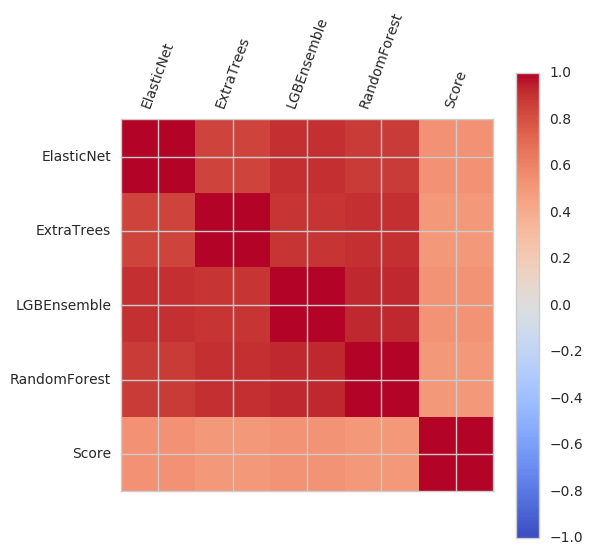

In [317]:
corrbase = corr_matrix(EnsembleTrain)

In [329]:
#To Build Some Cool Datasets out of the initial Data
mergedTrainUncorr
mergedTestUncorr

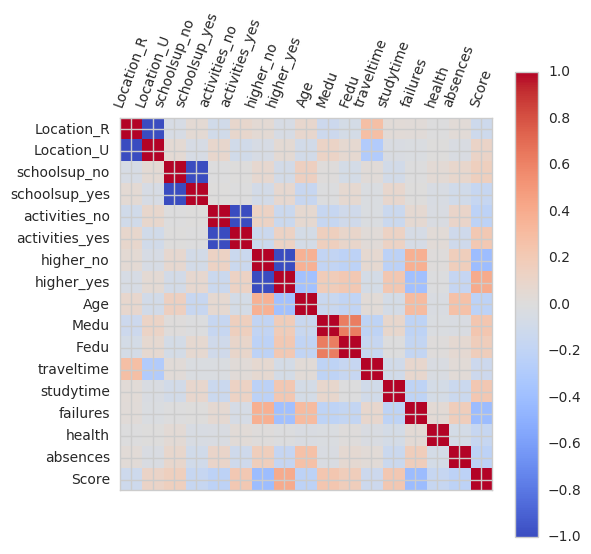

In [330]:
newCorr = corr_matrix(mergedTrainUncorr)

In [331]:
col = ['failures', 'studytime', 'Fedu', 'Medu', 'higher_yes', 'higher_no', 'schoolsup_no', 'schoolsup_yes', 'activities_yes', 'activities_no', 'Score']

In [332]:
selMergedTrain = mergedTrainUncorr.loc[:, col]
selMergedTest = mergedTestUncorr.loc[:, col[:-1]]

In [337]:
numTrainX, numCVX, numTrainY, numCVY = createCV(selMergedTrain, label="Score")
selModelRF = trainRFRegression(numTrainX, numCVX, numTrainY, numCVY )

4.46790509248
The Root Mean Square Error is 5.619114058082741


In [338]:
results_df = predictTest(selModelRF, selMergedTest, idxTest)

In [339]:
selMergedTrain.head()

,failures,studytime,Fedu,Medu,higher_yes,higher_no,schoolsup_no,schoolsup_yes,activities_yes,activities_no,Score
0,0,2,4,4,1.0,0.0,0.0,1.0,0.0,1.0,22
1,0,2,1,1,1.0,0.0,1.0,0.0,0.0,1.0,31
2,0,2,1,1,1.0,0.0,0.0,1.0,0.0,1.0,37
3,0,3,2,4,1.0,0.0,1.0,0.0,1.0,0.0,42
4,0,2,3,3,1.0,0.0,1.0,0.0,0.0,1.0,37


In [390]:
createTrainFeat = numTrain.copy()
createTestFeat = numTest.copy()

In [391]:
createTrainFeat['Serious'] = createTrainFeat['traveltime'] - createTrainFeat['studytime'] #/ createTrainFeat['freetime']
createTrainFeat['parentEdu'] = createTrainFeat['Medu'] + createTrainFeat['Fedu']
#createTrainFeat['houseSweet'] = createTrainFeat['famrel'] / createTrainFeat['freetime']

createTestFeat['Serious'] = createTestFeat['traveltime'] - createTestFeat['studytime'] #/ createTrainFeat['freetime']
createTestFeat['parentEdu'] = createTestFeat['Medu'] + createTestFeat['Fedu']

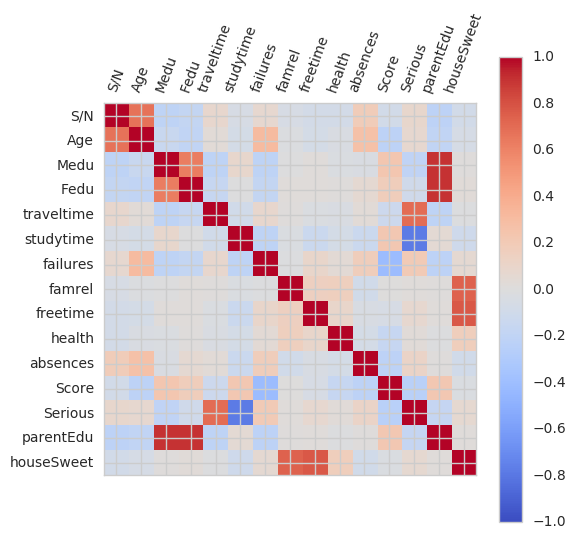

In [368]:
check = corr_matrix(createTrainFeat)

In [392]:
createTrainFeat.head()

,S/N,Age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,Score,Serious,parentEdu
0,1,13,4,4,2,2,0,4,3,3,4,22,0,8
1,2,12,1,1,1,2,0,5,3,3,2,31,-1,2
2,3,10,1,1,1,2,0,4,3,3,6,37,-1,2
3,4,10,4,2,1,3,0,3,2,5,0,42,-2,6
4,5,11,3,3,1,2,0,4,3,5,0,37,-1,6


In [366]:
check.columns

Index(['S/N', 'Age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'health', 'absences', 'Score', 'Serious',
       'parentEdu'],
      dtype='object')

In [395]:
numTrainSel = createTrainFeat.drop(["famrel", "freetime", "S/N"], axis=1)
numTestSel = createTestFeat.drop(["famrel", "freetime", "S/N"], axis=1)

In [396]:
numTrainSel.shape, numTestSel.shape

((325, 11), (323, 10))

In [398]:
numTrainX, numCVX, numTrainY, numCVY = createCV(numTrainSel, label="Score")
selectModelRF = trainLGBRegression(numTrainX, numCVX, numTrainY, numCVY )

4.53371214449
The Root Mean Square Error is 5.9379282988324


In [397]:
numTestSel.head()

,Age,Medu,Fedu,traveltime,studytime,failures,health,absences,Serious,parentEdu
0,12,3,2,1,1,0,3,18,0,5
1,13,1,1,2,4,0,3,2,-2,2
2,13,1,1,2,2,0,4,0,0,2
3,12,2,2,1,2,0,5,12,-1,4
4,13,2,1,2,2,0,5,10,0,3
